In [1]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

In [3]:
from plotly import __version__
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
crypto = {}

crypto['bitcoin'] = pd.read_csv('data/bitcoin_price.csv', parse_dates=['Date'])
crypto['dash'] = pd.read_csv("data/dash_price.csv", parse_dates=['Date'])
crypto['ethereum'] = pd.read_csv("data/ethereum_price.csv", parse_dates=['Date'])
crypto['litecoin'] = pd.read_csv("data/litecoin_price.csv", parse_dates=['Date'])
crypto['monero'] = pd.read_csv("data/monero_price.csv", parse_dates=['Date'])
crypto['nem'] = pd.read_csv("data/nem_price.csv", parse_dates=['Date'])
crypto['neo'] = pd.read_csv("data/neo_price.csv", parse_dates=['Date'])
crypto['ripple'] = pd.read_csv("data/ripple_price.csv", parse_dates=['Date'])
crypto['stratis'] = pd.read_csv("data/stratis_price.csv", parse_dates=['Date'])
crypto['waves'] = pd.read_csv("data/waves_price.csv", parse_dates=['Date'])

for key, value in crypto.items():
    value.set_index('Date', inplace = True, drop=False)
    
for key, value in crypto.items():
    print(key, value.shape[0])

bitcoin 1620
dash 1328
ethereum 789
litecoin 1620
monero 1231
nem 917
neo 390
ripple 1522
stratis 418
waves 489


In [5]:
bitcoin_close = go.Scatter(
    x=crypto['bitcoin'].index,
    y=crypto['bitcoin']['Close'],
    name = "Bitcoin Closing Price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

data = [bitcoin_close]

layout = dict(
    title='Bitcoin Closing Price Time Series',
    xaxis=dict(
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout = layout)
iplot(fig)

bitcoin_candlestick = go.Candlestick(x=crypto['bitcoin'].index,
                                     open=crypto['bitcoin']['Open'],
                                     high=crypto['bitcoin']['High'],
                                     low=crypto['bitcoin']['Low'],
                                     close=crypto['bitcoin']['Close'], 
                                     name = 'Price')

layout = dict(
    title='Bitcoin CandleStick Chart',
    xaxis=dict(
        rangeslider=dict(),
        type='date'
    )
)

data = [bitcoin_candlestick]

fig = dict(data=data, layout = layout)
iplot(fig, filename='legend-names')


In [6]:
ethereum_close = go.Scatter(
    x=crypto['ethereum'].index,
    y=crypto['ethereum']['Close'],
    name = "Ethereum Closing Price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

data = [ethereum_close]

layout = dict(
    title='Ethereum Closing Price Time Series',
    xaxis=dict(
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout = layout)
iplot(fig)

ethereum_candlestick = go.Candlestick(x=crypto['ethereum'].index,
                                     open=crypto['ethereum']['Open'],
                                     high=crypto['ethereum']['High'],
                                     low=crypto['ethereum']['Low'],
                                     close=crypto['ethereum']['Close'], 
                                     name = 'Price')

layout = dict(
    title='Ethereum CandleStick Chart',
    xaxis=dict(
        rangeslider=dict(),
        type='date'
    )
)

data = [ethereum_candlestick]

fig = dict(data=data, layout = layout)
iplot(fig, filename='legend-names')


In [40]:
close_price_df = pd.DataFrame()
close_price_df['bitcoin'] = crypto['bitcoin']['Close']
close_price_df.set_index(crypto['bitcoin'].index, inplace = True)

for key, value in crypto.items():
    if key == 'bitcoin' or key == 'bitcoin':
        continue
    close_price_df = pd.merge(close_price_df, pd.DataFrame(crypto[key]['Close']), left_index=True, right_index=True)

close_price_df.columns = crypto.keys()
print(close_price_df.shape)

(390, 10)


In [41]:
close_price_df.iplot()

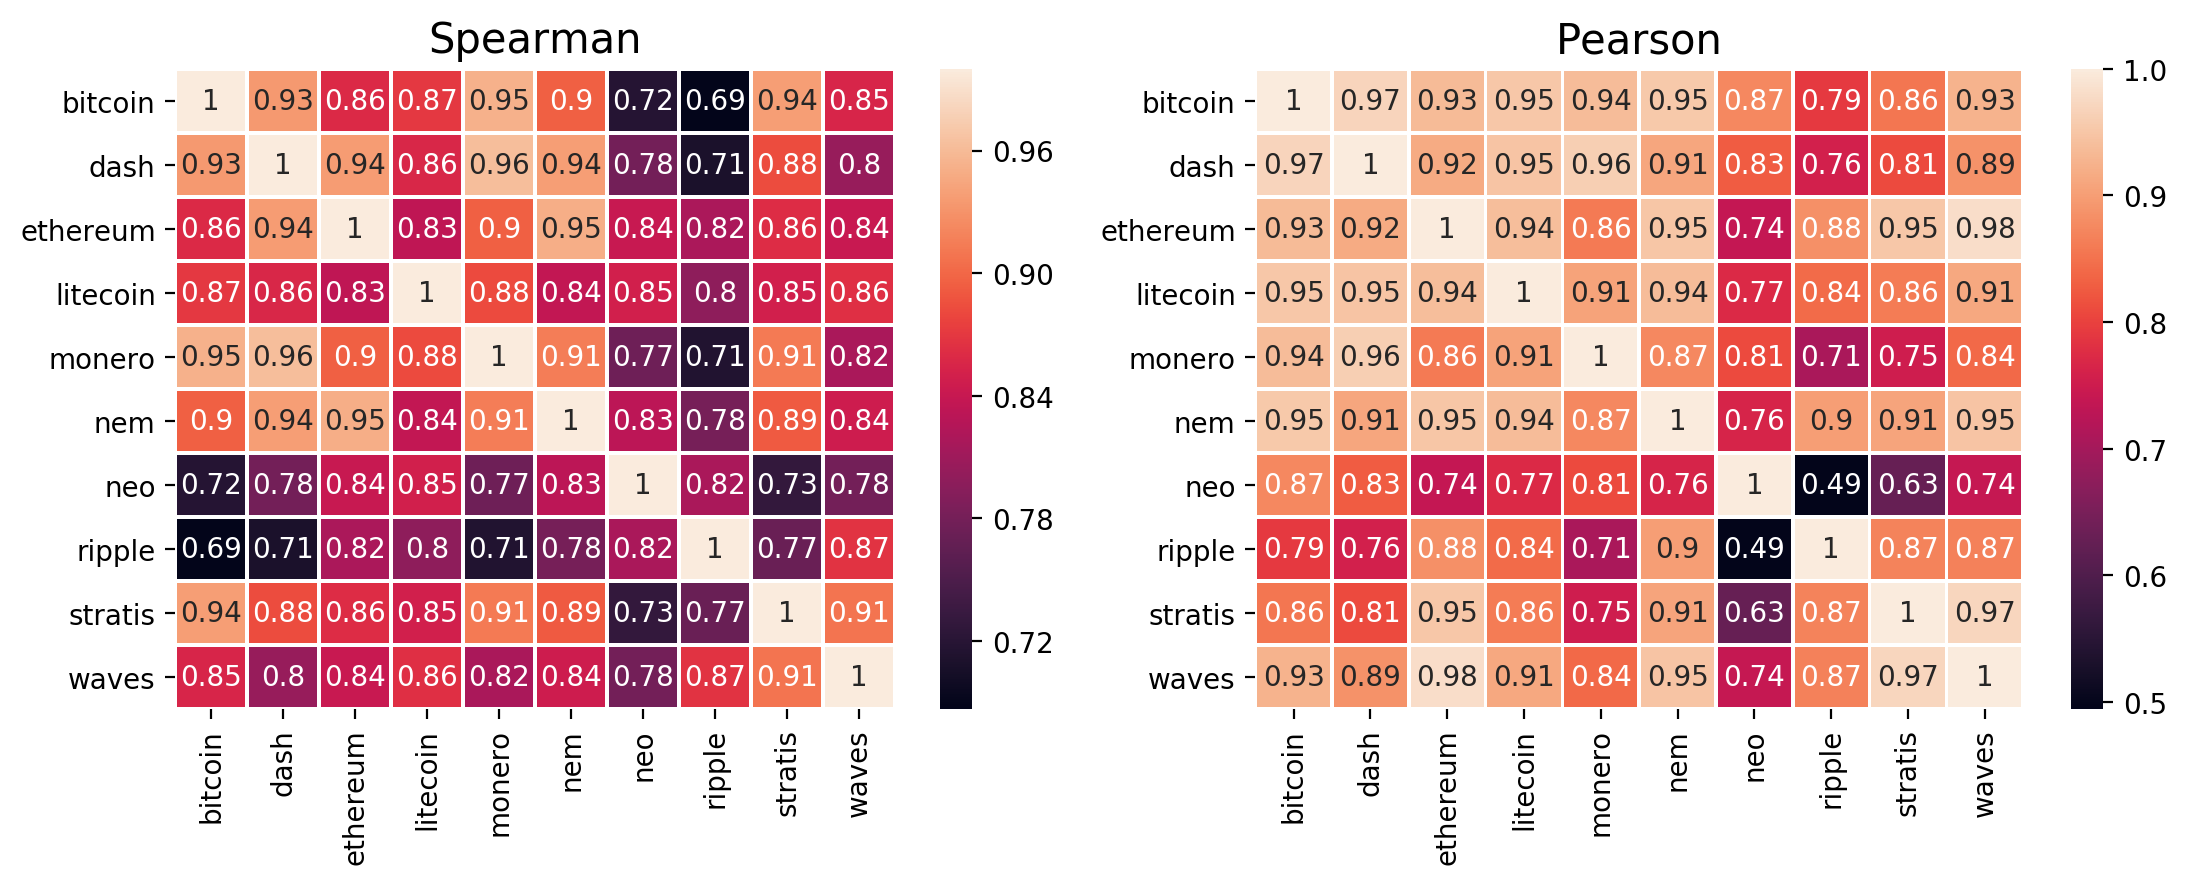

In [26]:
fig = plt.figure(dpi = 200)

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.8]) # main axes
sns.heatmap(close_price_df.corr(method='spearman'), lw = 1, linecolor='white', annot = True)
axes1.set_title("Spearman", fontsize=15)

axes2 = fig.add_axes([1, 0.1, 0.8, 0.8]) # inset axes
sns.heatmap(close_price_df.corr(method='pearson'), lw = 1, linecolor='white', annot = True, )
plt.title("Pearson", fontsize=15)

(789, 5)


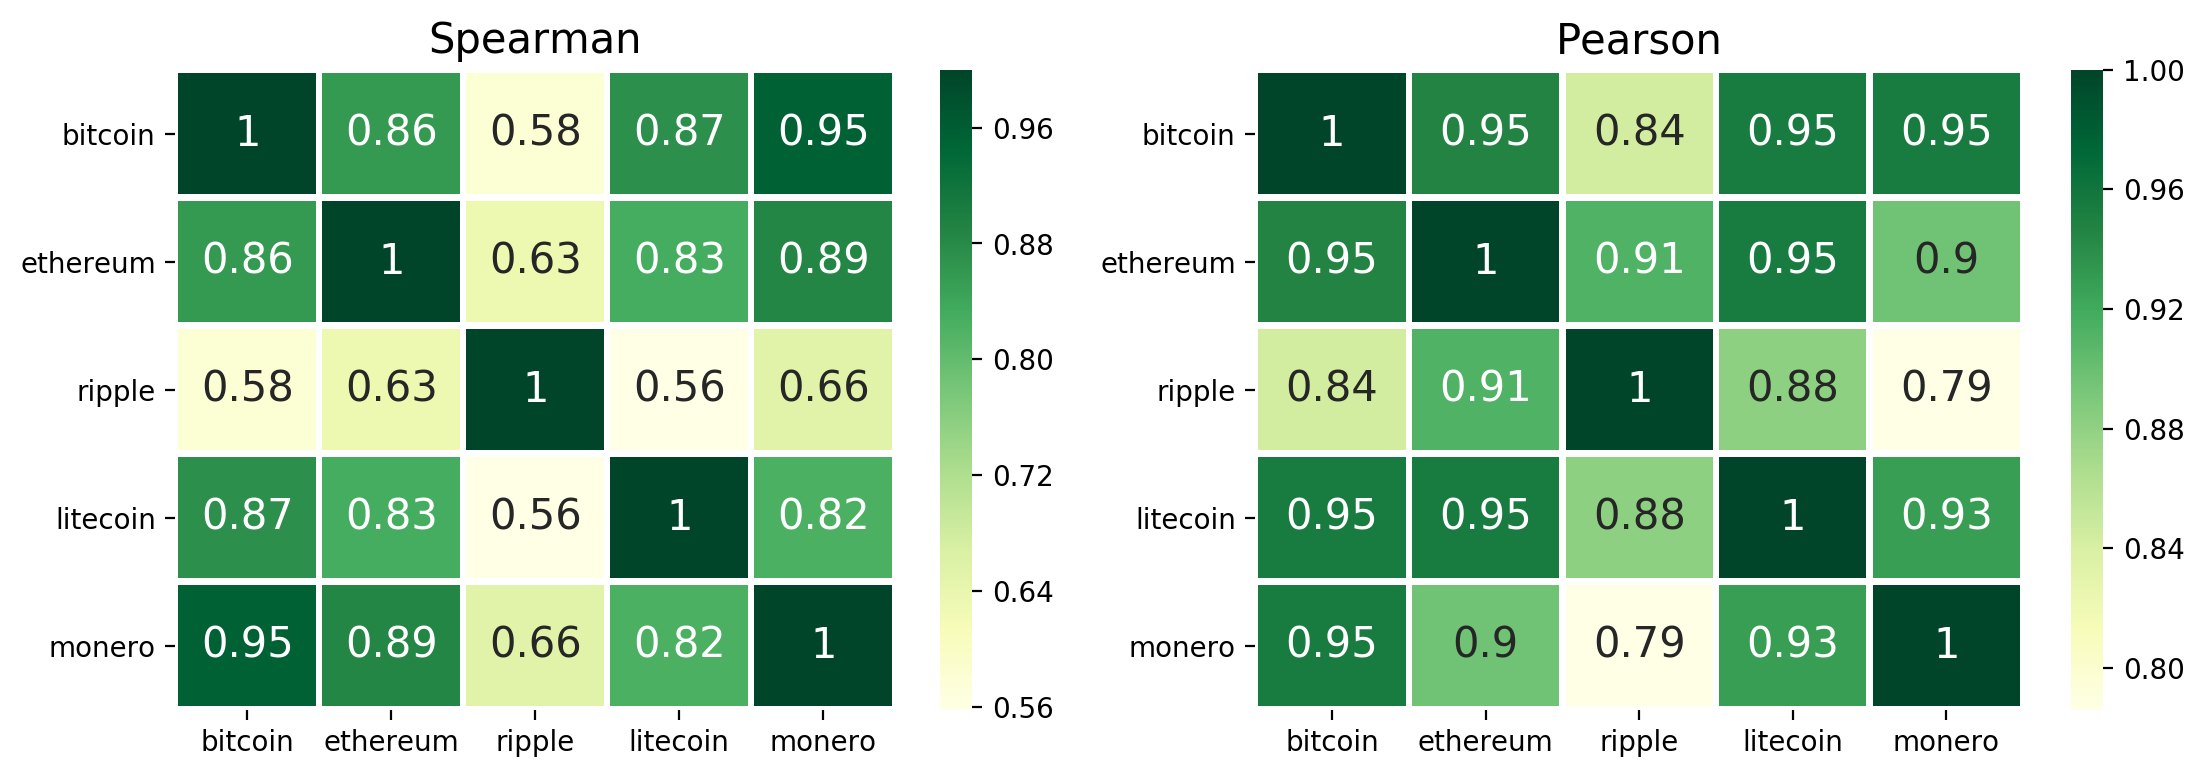

In [34]:
files_to_use = ['bitcoin', 'ethereum', 'ripple', 'litecoin','monero']

for ind, currency_name in enumerate(files_to_use):
    if ind == 0:
        five_crypto_df = crypto[currency_name][["Date", "Close"]]
        five_crypto_df.columns = ["Date", currency_name]
    else:
        temp_df = crypto[currency_name][["Date", "Close"]]
        temp_df.columns = ["Date", currency_name]
        five_crypto_df = pd.merge(five_crypto_df, temp_df, on="Date")

five_crypto_df.set_index('Date', inplace = True, drop=True)
print(five_crypto_df.shape)

fig = plt.figure(dpi = 200)

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.8]) # main axes
sns.heatmap(five_crypto_df.corr(method='spearman'), lw = 2, annot = True, annot_kws={"size": 15}, cmap='YlGn')
axes1.set_title("Spearman", fontsize=15)

axes2 = fig.add_axes([1, 0.1, 0.8, 0.8]) # inset axes
sns.heatmap(five_crypto_df.corr(method='pearson'), lw = 2, annot = True, annot_kws={"size": 15}, cmap='YlGn')
plt.title("Pearson", fontsize=15)

We can also observe this visually by plotting a pair plot using the seaborn libraries

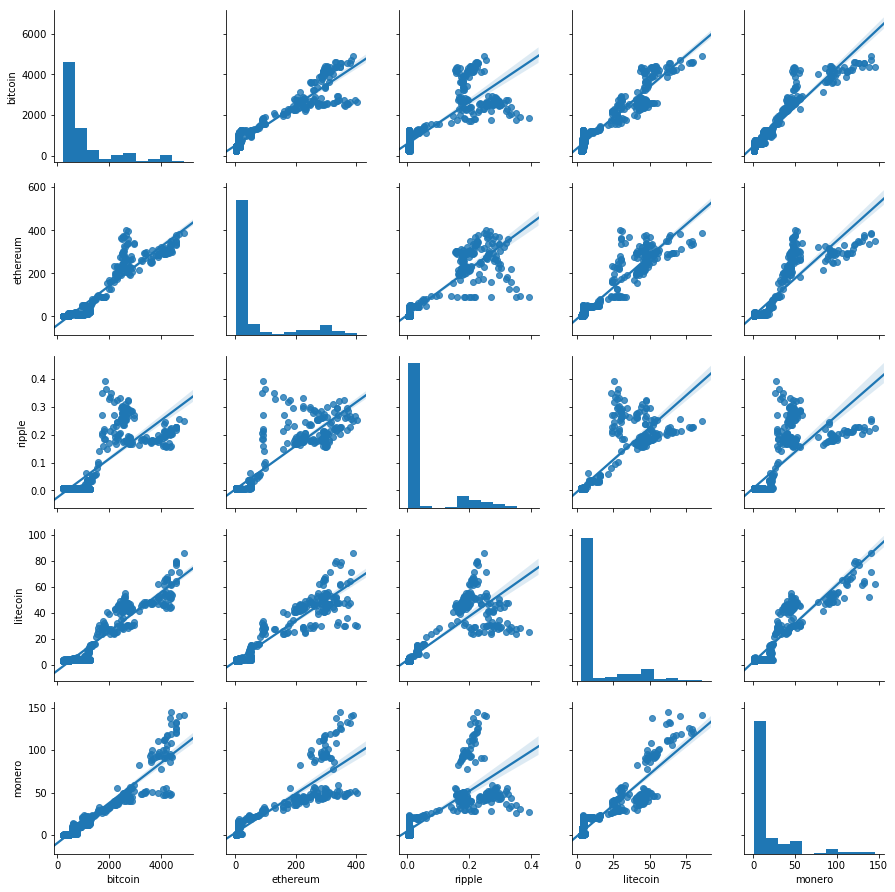

In [39]:
sns.pairplot(five_crypto_df, kind='reg', palette = 'Y1Gn')

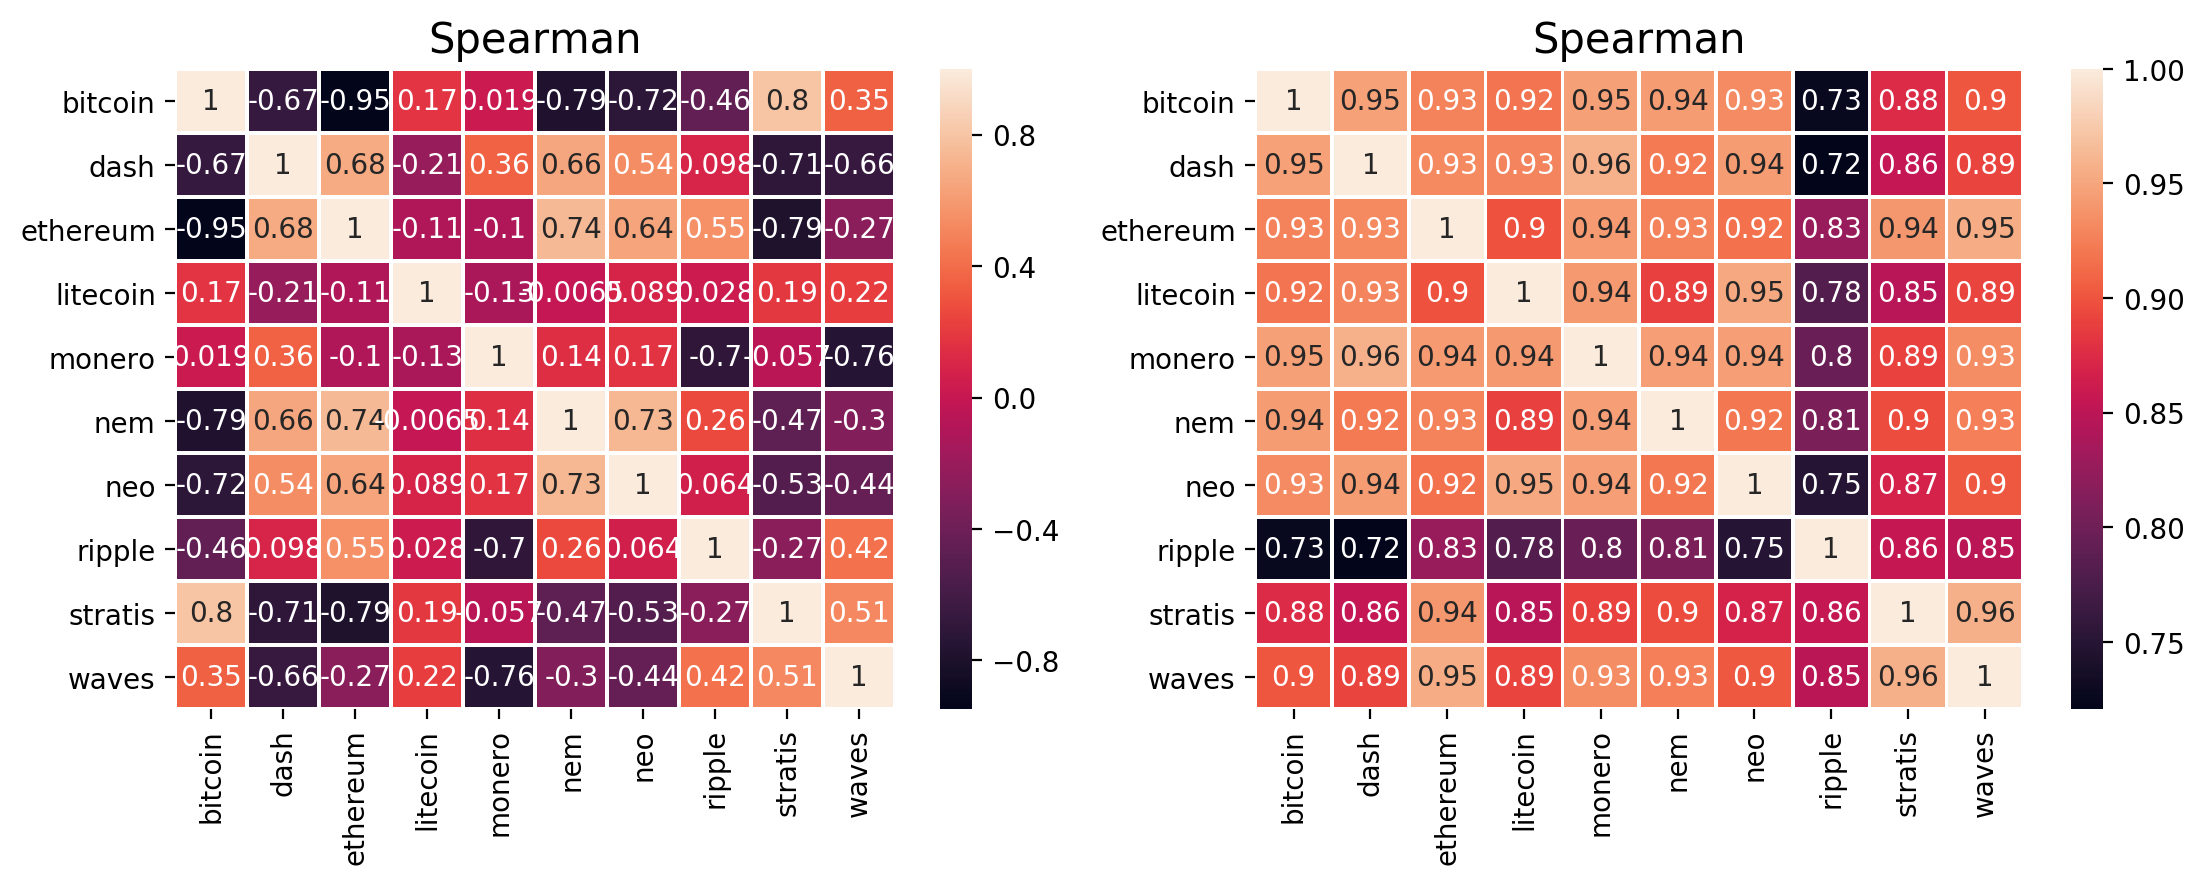

In [36]:
# close_price_df.ix[close_price_df.index.year == 2017]

fig = plt.figure(dpi = 200)

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.8]) # main axes
sns.heatmap(close_price_df.ix[close_price_df.index.year == 2016].corr(method='spearman'), lw = 1, linecolor='white', annot = True)
axes1.set_title("Spearman", fontsize=15)

axes2 = fig.add_axes([1, 0.1, 0.8, 0.8]) # inset axes
sns.heatmap(close_price_df.ix[close_price_df.index.year == 2017].corr(method='spearman'), lw = 1, linecolor='white', annot = True, )
plt.title("Spearman", fontsize=15)

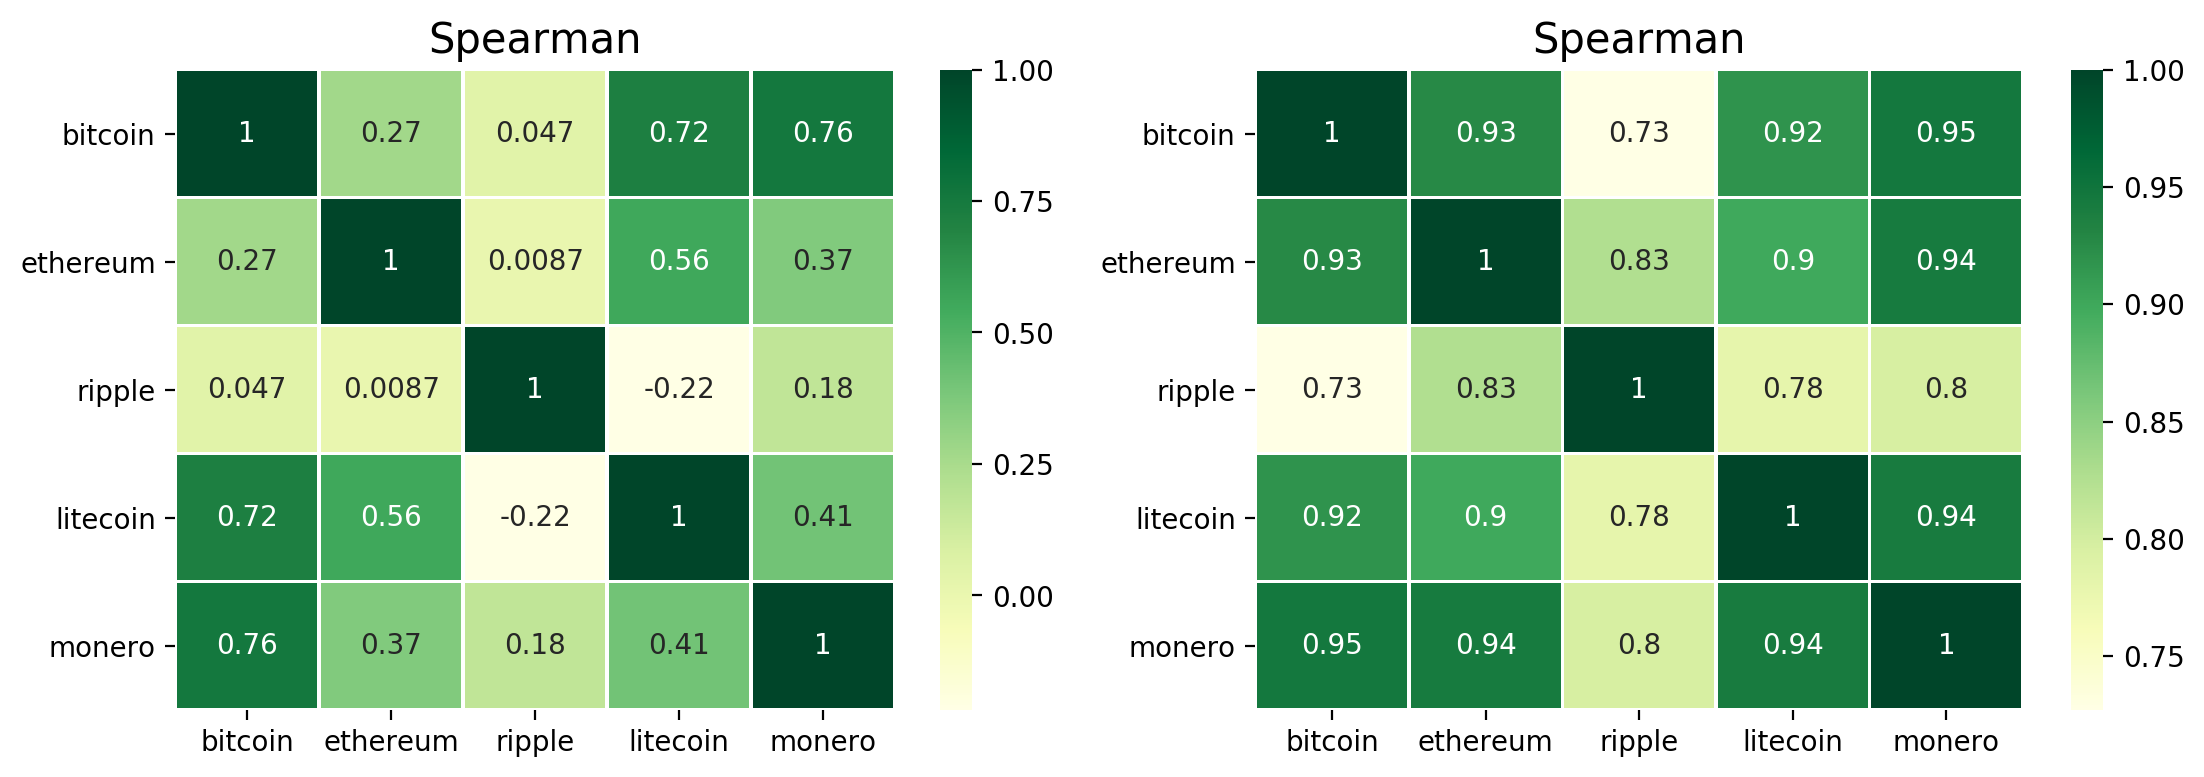

In [38]:
fig = plt.figure(dpi = 200)

axes1 = fig.add_axes([0.1, 0.1, 0.75, 0.8]) # main axes
sns.heatmap(five_crypto_df.ix[five_crypto_df.index.year == 2016].corr(method='spearman'), lw = 1, linecolor='white', annot = True, cmap = 'YlGn')
axes1.set_title("Spearman", fontsize=15)

axes2 = fig.add_axes([1, 0.1, 0.8, 0.8]) # inset axes
sns.heatmap(five_crypto_df.ix[five_crypto_df.index.year == 2017].corr(method='spearman'), lw = 1, linecolor='white', annot = True, cmap = 'YlGn')
plt.title("Spearman", fontsize=15)

Multiple methods of stationarity and differencing : https://www.otexts.org/fpp/8/1
* Differencing
* Random Walk Model
* Second Order Differencing
* Seasonal differencing
* Unit root tests

In [11]:
close_log_df = pd.DataFrame()

close_log_df['bitcoin'] = np.log(crypto['bitcoin']['Close'])
close_log_df.set_index(crypto['bitcoin'].index, inplace = True)

for key, value in crypto.items():
    if key == 'bitcoin':
        continue
    close_log_df = pd.merge(close_log_df, pd.DataFrame( np.log(crypto[key]['Close']) ), left_index=True, right_index=True)

close_log_df.columns = list(crypto.keys())
print(close_log_df.shape)
close_log_df.iplot()

(390, 10)


In [12]:
close_diff_df = pd.DataFrame()

close_diff_df['bitcoin'] = crypto['bitcoin']['Close'].pct_change() * 100
close_diff_df.set_index(crypto['bitcoin'].index, inplace = True)

for key, value in crypto.items():
    if key == 'bitcoin':
        continue
    close_diff_df = pd.merge(close_diff_df, pd.DataFrame( crypto[key]['Close'].pct_change() * 100 ), left_index=True, right_index=True)

close_diff_df.columns = list(crypto.keys())
print(close_diff_df.shape)
close_diff_df.iplot()

(390, 10)


In [13]:
for coin in close_diff_df.columns:
    print(coin,':')
    result = adfuller(close_diff_df[coin][1:])
    print('\tADF Statistic: \t%f' % result[0])
    print('\tp-value: \t%f' % result[1])

bitcoin :
	ADF Statistic: 	-20.356330
	p-value: 	0.000000
dash :
	ADF Statistic: 	-19.450485
	p-value: 	0.000000
ethereum :
	ADF Statistic: 	-19.766226
	p-value: 	0.000000
litecoin :
	ADF Statistic: 	-7.377528
	p-value: 	0.000000
monero :
	ADF Statistic: 	-20.749264
	p-value: 	0.000000
nem :
	ADF Statistic: 	-20.716136
	p-value: 	0.000000
neo :
	ADF Statistic: 	-19.625786
	p-value: 	0.000000
ripple :
	ADF Statistic: 	-4.691824
	p-value: 	0.000087
stratis :
	ADF Statistic: 	-10.124003
	p-value: 	0.000000
waves :
	ADF Statistic: 	-18.256548
	p-value: 	0.000000


Here the statistic values are negative, and hence we will reject the null hypothesis, so we look at p-values. Here, p-values are significantly low, and hence we can say that our data is stationary. 

Ref: https://machinelearningmastery.com/time-series-data-stationary-python/

The same can also be demonstrated by plotting the distribution curves for each cryptocurrency as shown below. 

In [63]:
fig = ff.create_distplot(np.array(close_diff_df.iloc[1:].T), 
                         group_labels = close_diff_df.columns, 
                         show_hist = False)

fig['layout'].update(title='Customized Distplot')
iplot(fig, filename='Distplot Colors')